In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
data = df.drop(['PassengerId','Name','Ticket'],axis=1)

In [16]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [17]:
data.shape

(891, 9)

In [37]:
data.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
Cabin_side    687
dtype: int64

In [ ]:
[a-zA-Z]96

In [24]:
data.Cabin = data.Cabin.astype('str')

In [27]:
import regex as re
def use_regex(input_text):
    pattern = re.search("([a-zA-Z])", input_text)
    return pattern.group(1)

In [28]:
data['Cabin_side'] = data.apply(lambda row: use_regex(row['Cabin']),axis=1)

In [29]:
data.drop(['Cabin'],axis=1,inplace=True)

In [36]:
data.Cabin_side.replace('n',np.NAN,inplace=True)

In [38]:
data.Cabin_side.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [40]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 3 categorical variables

The categorical variables are : ['Sex', 'Embarked', 'Cabin_side']


In [41]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(data[var].unique()), ' levels')

Sex  contains  2  levels
Embarked  contains  4  levels
Cabin_side  contains  9  levels


C:\Users\shara\AppData\Local\Temp\ipykernel_21596\2808442434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data.corr(), annot=True)


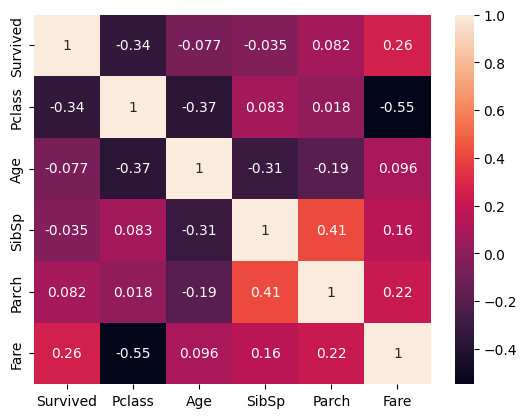

In [42]:
ax = sns.heatmap(data.corr(), annot=True)

In [43]:
# find numerical variables

numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [44]:
data[numerical].isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [45]:
print(round(data[numerical].describe()),2)

       Survived  Pclass    Age  SibSp  Parch   Fare
count     891.0   891.0  714.0  891.0  891.0  891.0
mean        0.0     2.0   30.0    1.0    0.0   32.0
std         0.0     1.0   15.0    1.0    1.0   50.0
min         0.0     1.0    0.0    0.0    0.0    0.0
25%         0.0     2.0   20.0    0.0    0.0    8.0
50%         0.0     3.0   28.0    0.0    0.0   14.0
75%         1.0     3.0   38.0    1.0    0.0   31.0
max         1.0     3.0   80.0    8.0    6.0  512.0 2


Text(0, 0.5, 'Fare')

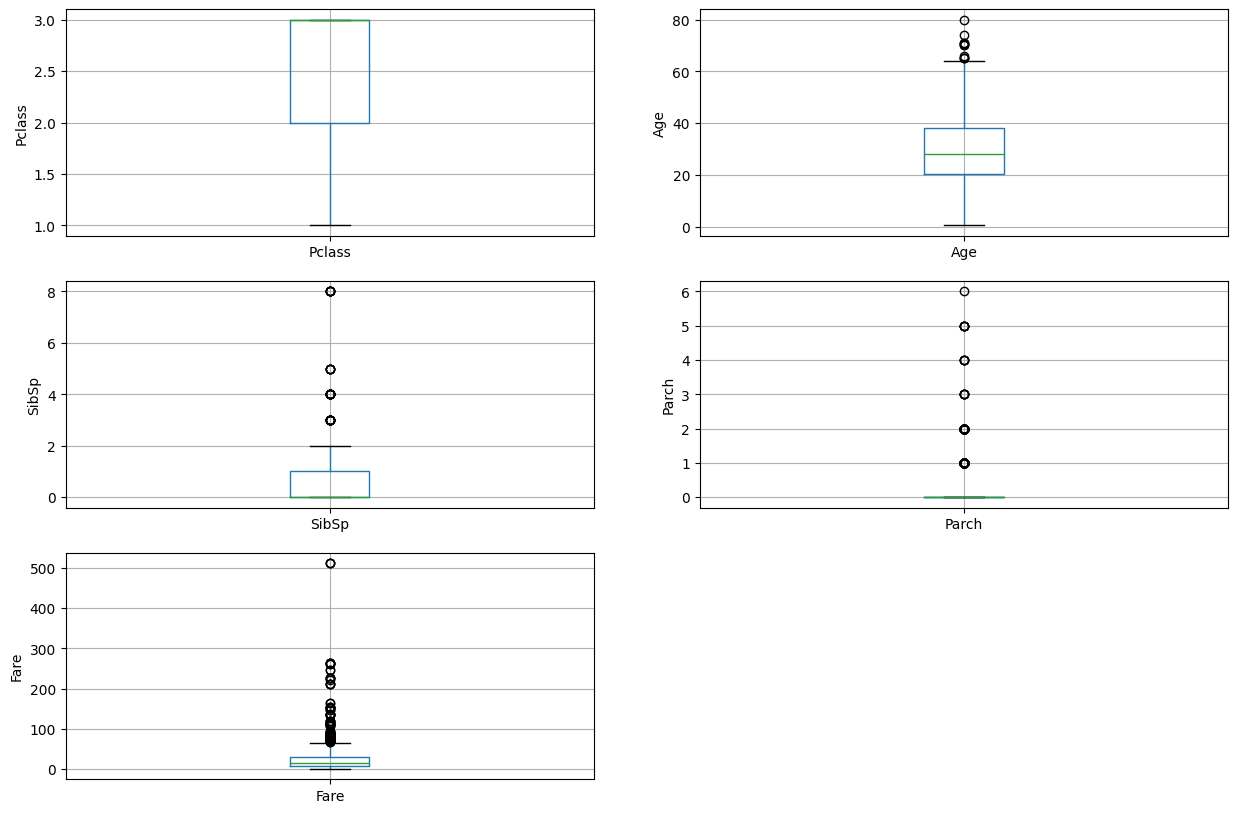

In [46]:
plt.figure(figsize=(15,10))


plt.subplot(3, 2, 1)
fig = data.boxplot(column='Pclass')
fig.set_title('')
fig.set_ylabel('Pclass')


plt.subplot(3, 2, 2)
fig = data.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')


plt.subplot(3, 2, 3)
fig = data.boxplot(column='SibSp')
fig.set_title('')
fig.set_ylabel('SibSp')


plt.subplot(3, 2, 4)
fig = data.boxplot(column='Parch')
fig.set_title('')
fig.set_ylabel('Parch')

plt.subplot(3, 2, 5)
fig = data.boxplot(column='Fare')
fig.set_title('')
fig.set_ylabel('Fare')



Text(0, 0.5, 'Survived')

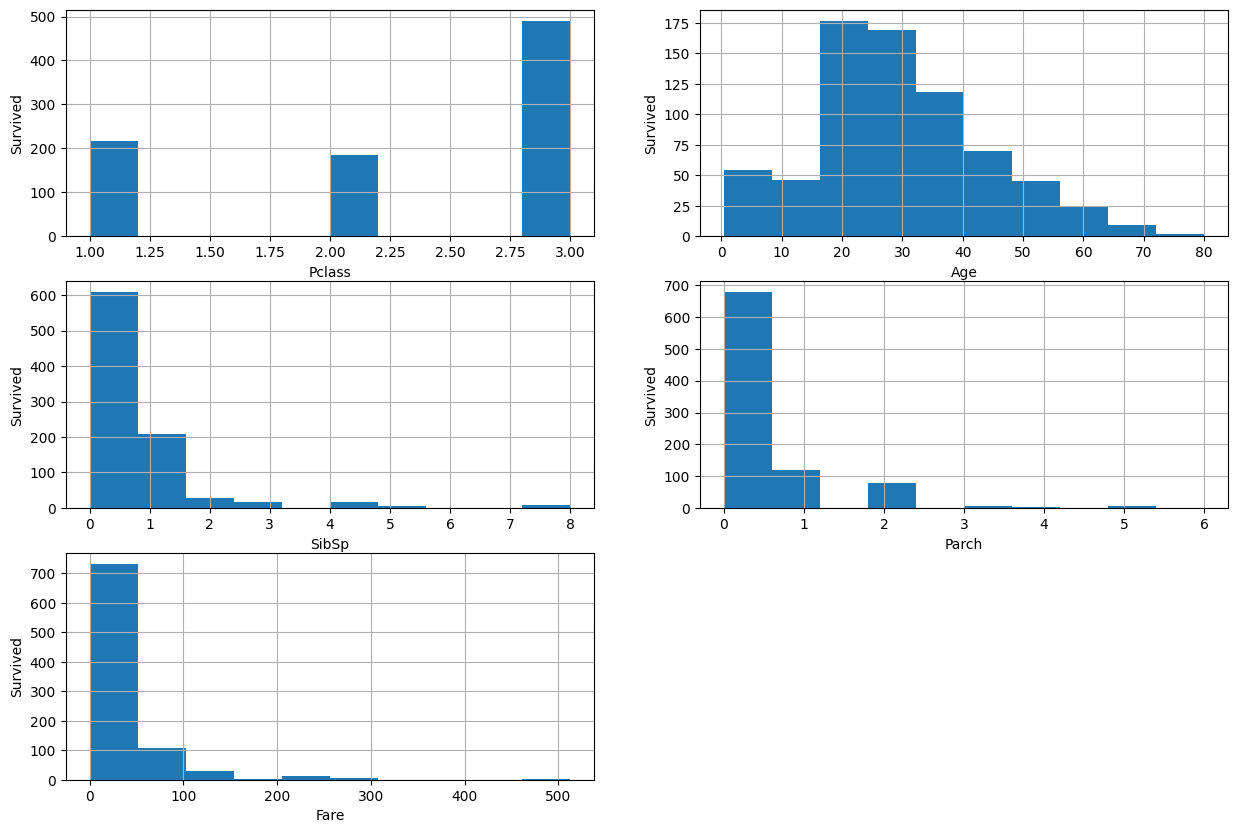

In [47]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(3, 2, 1)
fig = data.Pclass.hist(bins=10)
fig.set_xlabel('Pclass')
fig.set_ylabel('Survived')


plt.subplot(3, 2, 2)
fig = data.Age.hist(bins=10)
fig.set_xlabel('Age')
fig.set_ylabel('Survived')


plt.subplot(3, 2, 3)
fig = data.SibSp.hist(bins=10)
fig.set_xlabel('SibSp')
fig.set_ylabel('Survived')


plt.subplot(3, 2, 4)
fig = data.Parch.hist(bins=10)
fig.set_xlabel('Parch')
fig.set_ylabel('Survived')

plt.subplot(3, 2, 5)
fig = data.Fare.hist(bins=10)
fig.set_xlabel('Fare')
fig.set_ylabel('Survived')


In [48]:
# find outliers for Pclass variable

IQR = data.Pclass.quantile(0.75) - data.Pclass.quantile(0.25)
Lower_fence = data.Pclass.quantile(0.25) - (IQR * 3)
Upper_fence = data.Pclass.quantile(0.75) + (IQR * 3)
print('Pclass outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Pclass outliers are values < -1.0 or > 6.0


In [49]:
# find outliers for Age variable

IQR = data.Age.quantile(0.75) - data.Age.quantile(0.25)
Lower_fence = data.Age.quantile(0.25) - (IQR * 3)
Upper_fence = data.Age.quantile(0.75) + (IQR * 3)
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Age outliers are values < -33.5 or > 91.625


In [50]:
# find outliers for SibSp variable

IQR = data.SibSp.quantile(0.75) - data.SibSp.quantile(0.25)
Lower_fence = data.SibSp.quantile(0.25) - (IQR * 3)
Upper_fence = data.SibSp.quantile(0.75) + (IQR * 3)
print('SibSp outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

SibSp outliers are values < -3.0 or > 4.0


In [74]:
# find outliers for Parch variable

IQR = data.Parch.quantile(0.75) - data.Parch.quantile(0.25)
Lower_fence = data.Parch.quantile(0.25) - (IQR * 3)
Upper_fence = data.Parch.quantile(0.75) + (IQR * 3)
print('Parch outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Parch outliers are values < 0.0 or > 0.0


In [52]:
# find outliers for Fare variable

IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)
Lower_fence = data.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = data.Fare.quantile(0.75) + (IQR * 3)
print('Fare outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Fare outliers are values < -61.358399999999996 or > 100.2688


Feature Engineering

In [90]:
X = data.drop(['Survived'],axis =1)
y = data['Survived']

In [153]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 2)

In [154]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((712, 8), (179, 8))

In [155]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Sex', 'Embarked', 'Cabin_side']

In [156]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [157]:
X_train[numerical].isnull().sum()

Pclass      0
Age       148
SibSp       0
Parch       0
Fare        0
dtype: int64

In [158]:
X_test[numerical].isnull().sum()

Pclass     0
Age       29
SibSp      0
Parch      0
Fare       0
dtype: int64

In [159]:
for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

Age 0.2079


In [160]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)  

In [161]:
X_train[numerical].isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [162]:
X_test[numerical].isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

Categorical data

In [163]:
X_train[categorical].isnull().sum()

Sex             0
Embarked        2
Cabin_side    552
dtype: int64

In [164]:
X_train[categorical].isnull().mean()

Sex           0.000000
Embarked      0.002809
Cabin_side    0.775281
dtype: float64

In [165]:
X_test[categorical].isnull().mean()

Sex           0.00000
Embarked      0.00000
Cabin_side    0.75419
dtype: float64

In [166]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['Embarked'].fillna(X_train['Embarked'].mode()[0], inplace=True)
    df2['Cabin_side'].fillna(X_train['Cabin_side'].mode()[0], inplace=True)
    

In [167]:
X_train[categorical].isnull().mean()

Sex           0.0
Embarked      0.0
Cabin_side    0.0
dtype: float64

In [168]:
X_test[categorical].isnull().mean()

Sex           0.0
Embarked      0.0
Cabin_side    0.0
dtype: float64

In [169]:
X_train.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Cabin_side    0
dtype: int64

In [170]:
X_test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Cabin_side    0
dtype: int64

In [171]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Pclass'] = max_value(df3, 'Pclass', 6)
    df3['Age'] = max_value(df3, 'Age', 91.625)
    df3['SibSp'] = max_value(df3, 'SibSp', 4)
    df3['Fare'] = max_value(df3, 'Fare', 100.2688)

In [172]:
X_train[numerical].describe()

,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.300562,29.570576,0.485955,0.407303,27.217846
std,0.838322,12.727512,0.923105,0.841840,27.426489
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,28.750000,0.000000,0.000000,14.458300
75%,3.000000,35.000000,1.000000,0.250000,31.068750
max,3.000000,71.000000,4.000000,6.000000,100.268800


In [173]:
X_test[numerical].describe()

,Pclass,Age,SibSp,Parch,Fare
count,179.000000,179.000000,179.000000,179.000000,179.000000
mean,2.340782,29.271899,0.486034,0.279330,26.348313
std,0.828605,14.101770,0.850364,0.636147,27.055516
min,1.000000,0.920000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.925000
50%,3.000000,28.750000,0.000000,0.000000,14.000000
75%,3.000000,35.000000,1.000000,0.000000,30.750000
max,3.000000,80.000000,4.000000,4.000000,100.268800


Encoding categorical variables

In [174]:
X_train[categorical].head()

,Sex,Embarked,Cabin_side
30,male,C,C
10,female,S,G
873,male,S,C
182,male,S,C
876,male,S,C


In [175]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(data[var].unique()), ' levels')

Sex  contains  2  levels
Embarked  contains  4  levels
Cabin_side  contains  9  levels


In [176]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['Sex'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [177]:
X_train.head()

,Pclass,Sex_0,Sex_1,Age,SibSp,Parch,Fare,Embarked,Cabin_side
30,1,0,1,40.0,0,0,27.7208,C,C
10,3,1,0,4.0,1,1,16.7000,S,G
873,3,0,1,47.0,0,0,9.0000,S,C
182,3,0,1,9.0,4,2,31.3875,S,C
876,3,0,1,20.0,0,0,9.8458,S,C


In [178]:
X_train = pd.concat([X_train[numerical], X_train[['Sex_0','Sex_1']],
                     pd.get_dummies(X_train.Embarked), 
                     pd.get_dummies(X_train.Cabin_side),
                    ], axis=1)

In [179]:
X_test = pd.concat([X_test[numerical], X_test[['Sex_0','Sex_1']],
                     pd.get_dummies(X_test.Embarked), 
                     pd.get_dummies(X_test.Cabin_side),
                    ], axis=1)

In [180]:
X_train.shape,X_test.shape

((712, 18), (179, 17))

In [181]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_0', 'Sex_1', 'C', 'Q',
       'S', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'],
      dtype='object')

In [182]:
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_0', 'Sex_1', 'C', 'Q',
       'S', 'A', 'B', 'C', 'D', 'E', 'F', 'G'],
      dtype='object')

Scaling

In [183]:
cols = X_train.columns

In [184]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- T

  warnings.warn(message, FutureWarning)


ValueError: X has 17 features, but MinMaxScaler is expecting 18 features as input.

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,VIP_0,VIP_1,CryoSleep_0,CryoSleep_1,P,S,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Earth,Europa,Mars
count,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000
mean,0.364983,0.233710,0.224969,0.228792,0.225983,0.226283,0.022865,0.977135,0.348720,0.651280,0.485332,0.514668,0.205925,0.089445,0.704630,0.547455,0.245614,0.206931
std,0.181405,0.403634,0.396269,0.399997,0.393761,0.397175,0.149482,0.149482,0.476599,0.476599,0.499821,0.499821,0.404405,0.285405,0.456242,0.497779,0.430482,0.405135
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.477848,0.239362,0.194079,0.212963,0.223517,0.217391,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
